In [9]:
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_ds, validation_data=val_ds, epochs=5)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 422ms/step - accuracy: 0.5399 - loss: 0.7693 - val_accuracy: 0.6400 - val_loss: 0.6331
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 464ms/step - accuracy: 0.6861 - loss: 0.5965 - val_accuracy: 0.7040 - val_loss: 0.6091
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 410ms/step - accuracy: 0.7301 - loss: 0.5099 - val_accuracy: 0.6900 - val_loss: 0.6193
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 411ms/step - accuracy: 0.8209 - loss: 0.3940 - val_accuracy: 0.7070 - val_loss: 0.6033
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 434ms/step - accuracy: 0.8828 - loss: 0.2960 - val_accuracy: 0.7070 - val_loss: 0.6694


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


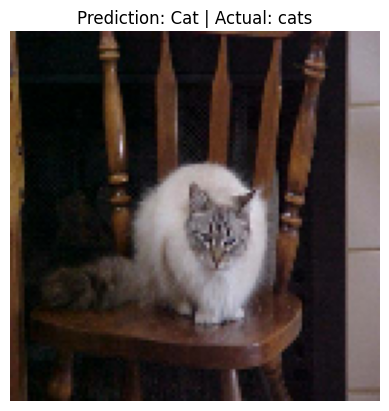

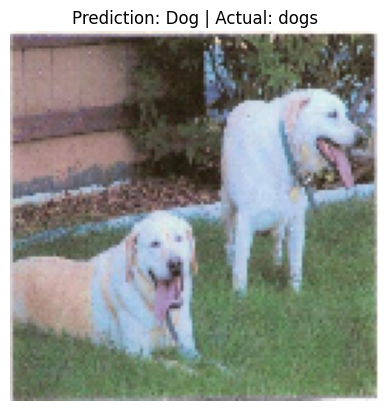

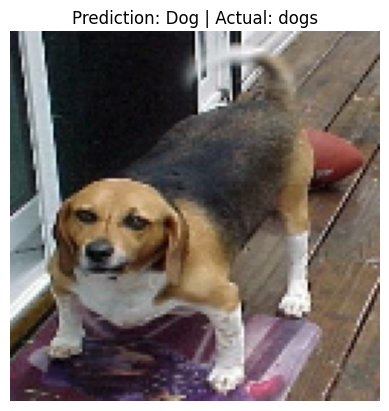

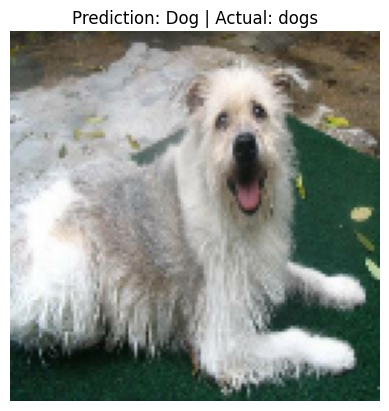

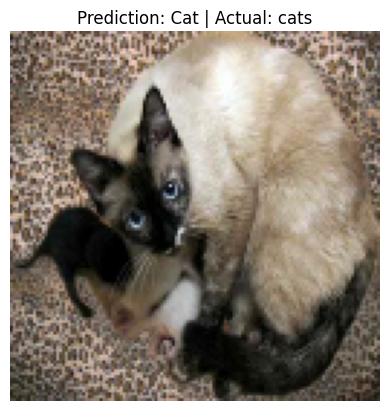

In [11]:
import matplotlib.pyplot as plt
import numpy as np


class_names = train_ds.class_names


for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    for i in range(5):
        plt.imshow(images[i].numpy().astype("uint8"))
        pred_label = "Dog" if predictions[i] > 0.5 else "Cat"
        actual_label = class_names[labels[i]]
        plt.title(f"Prediction: {pred_label} | Actual: {actual_label}")
        plt.axis("off")
        plt.show()
